<a href="https://colab.research.google.com/github/pawara101/MSC-2023/blob/main/Data-Science/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

np.random.seed(0)
centers = [[3,2], [6, 4], [10, 5]]
X, y = make_blobs(n_samples=200, centers=centers, cluster_std=0.9,random_state=0)

In [2]:
import matplotlib.pyplot as plt
np.shape(X)

(200, 2)

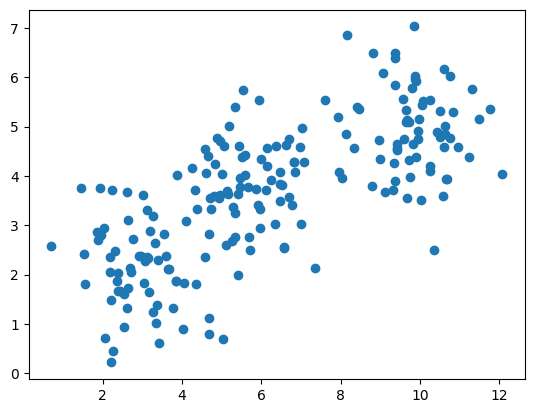

In [3]:
from sklearn.cluster import KMeans
import numpy as np
plt.scatter(X[:,0],X[:,1])

K means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init = 12, random_state=0).fit(X)

In [5]:
kmeans.labels_

array([2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1,
       0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1,
       2, 0], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[9.79181799, 4.92668909],
       [5.69328869, 3.83593694],
       [2.92845802, 2.0977956 ]])

In [7]:
ind0 = np.asarray(y==0).nonzero()
ind1 = np.asarray(y==1).nonzero()
ind2  = np.asarray(y==2).nonzero()

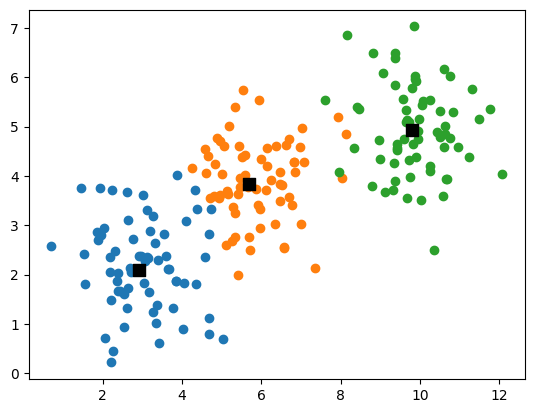

In [8]:
plt.scatter(X[ind0,0],X[ind0,1])
plt.scatter(X[ind1,0],X[ind1,1])
plt.scatter(X[ind2,0],X[ind2,1])
## Plot cluster centers
plt.scatter(9.79181799, 4.92668909,marker='s',s=80,color='k')
plt.scatter(5.69328869, 3.83593694,marker='s',s=80,color='k')
plt.scatter(2.92845802, 2.0977956,marker='s',s=80,color='k')

## Dendogram

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
clustering = AgglomerativeClustering(n_clusters=3,linkage='complete',compute_distances=True).fit(X)

In [10]:
print(clustering.distances_)

[4.16234330e-03 9.70745029e-03 1.89636263e-02 2.38968713e-02
 2.94951097e-02 3.31133763e-02 3.44442290e-02 4.22035153e-02
 5.32712394e-02 5.82790129e-02 5.85824593e-02 5.89846182e-02
 6.93932522e-02 7.20683725e-02 7.24132245e-02 7.73733561e-02
 8.43592975e-02 9.11978222e-02 9.21421254e-02 9.25044650e-02
 9.46191396e-02 9.59198233e-02 1.01442046e-01 1.04768916e-01
 1.07507111e-01 1.08755051e-01 1.11092215e-01 1.13118832e-01
 1.16537991e-01 1.17212389e-01 1.33748957e-01 1.34033309e-01
 1.36545763e-01 1.41520375e-01 1.47070324e-01 1.47890953e-01
 1.62569399e-01 1.62678830e-01 1.64330845e-01 1.72244734e-01
 1.72589847e-01 1.73447937e-01 1.74614279e-01 1.77672947e-01
 1.77850071e-01 1.80294995e-01 2.01572332e-01 2.04662433e-01
 2.09331365e-01 2.09577857e-01 2.09695839e-01 2.16047915e-01
 2.19072299e-01 2.25984625e-01 2.26593250e-01 2.34176333e-01
 2.34615063e-01 2.35522510e-01 2.36555246e-01 2.36647199e-01
 2.36964947e-01 2.38709384e-01 2.39703894e-01 2.47038480e-01
 2.47693869e-01 2.488391

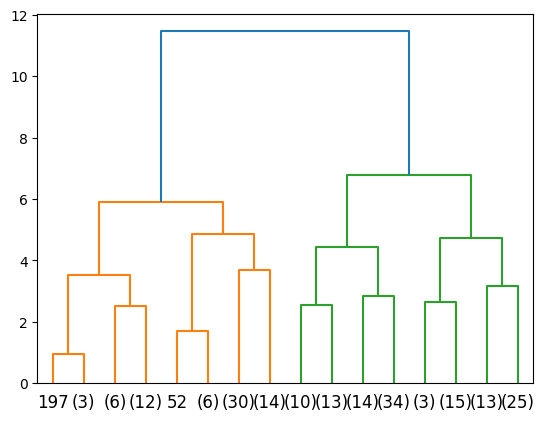

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(clustering, truncate_mode="level", p=3)

In [23]:
import math

def EucledeanDist(X):
  n = len(X)
  l=[[0] * n for i in range(n)]
  for i in range(0,len(X)):
    for j in range(0,len(X)):
      d = math.sqrt((X[i][0]-X[j][0])**2 + (X[i][1]-X[j][1])**2)
      l[i][j] = d

  return l
print(EucledeanDist(X))

[[0.0, 6.275697364396357, 2.5361376097840895, 4.071462573098657, 2.6985122886595403, 1.6690936065366107, 4.711373983861639, 6.421041730678093, 5.732401443842878, 2.713660052258767, 7.819948628181281, 5.617440447575052, 7.1977465110861445, 3.271608095816706, 7.790175941505056, 5.783568537285035, 3.7599274279260175, 5.817455090613713, 2.847514959177801, 7.088724258443001, 6.986940750982116, 1.6686053890419106, 2.154987613879567, 1.9243393643643207, 7.126349908865654, 3.8427465870441866, 4.706684762216403, 3.4627698936836557, 2.7853824903809565, 2.55159573489427, 3.7243254149031957, 5.18841737905555, 2.8550217068451462, 0.3609298113825015, 3.440098118843238, 7.829273863475513, 3.8864812565370674, 5.22668912547004, 5.93037415777088, 3.295634057895709, 2.5146010648272368, 4.353593492599992, 3.404556057324272, 3.2886179292476827, 6.419368011685162, 2.8052240756974895, 6.4949017088923275, 4.141226794752776, 2.69171487633427, 3.2252161730705047, 2.9418389054294467, 3.669571638921324, 6.9156328